In [158]:
# Initial imports

import pandas as pd
import numpy as np

# Load Data

In [159]:
# Load iris data and store in dataframe

from sklearn import datasets

iris = datasets.load_iris()

df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [160]:
# Separate X and y data

X = df.drop('target', axis=1)
y = df.target

# Functions / Code Outline

Things that need to happen:

1) Function to calculate distance between points

2) Calculate distance between a test point and all known data points

3) Sort distance measurements to see closest points (nearest neighbors)

4) Use labels of those closest points to predict label of test point

5) Perform steps 1 - 4 for all test data points

## Calculate distance between two points (Minkowski distance)

In [161]:
# Calculate distance between two points

def minkowski_distance(a, b, p=1):
    
    # Store the number of dimensions
    dim = len(a)
    
    # Set initial distance to 0
    distance = 0
    
    # Calculate minkowski distance using parameter p
    for d in range(dim):
        distance += abs(a[d] - b[d])**p
        
    distance = distance**(1/p)
    
    return distance


# Test the function

minkowski_distance(a=X.iloc[0], b=X.iloc[1], p=1)

0.6999999999999993

## Calculate distance between a test point and all known data points

In [162]:
# Define an arbitrary test point

test_pt = [4.8, 2.7, 2.5, 0.7]

# Calculate distance between test_pt and all points in X

distances = []

for i in X.index:
    
    distances.append(minkowski_distance(test_pt, X.iloc[i]))
    
df_dists = pd.DataFrame(data=distances, index=X.index, columns=['dist'])
df_dists.head()

,dist
0,2.7
1,2.0
2,2.3
3,2.1
4,2.7


## Sort distance measurements to see the closest points (nearest neighbors)

In [163]:
# Limit to 5 nearest points for now

df_nn = df_dists.sort_values(by=['dist'], axis=0)[:5]
df_nn

,dist
98,1.4
57,1.5
93,1.7
24,1.8
30,1.8


## Use labels of those closest points to predict label of test point

In [164]:
# Use df_nn.index to get labels for nearest neighbors

y[df_nn.index]

98    1
57    1
93    1
24    0
30    0
Name: target, dtype: int32

In [165]:
# Create counter object to track the labels

counter = Counter(y[df_nn.index])

# Get most common label of all the nearest neighbors

counter.most_common()[0][0]

1

## Perform steps 2.1 - 2.4 for all test data points

In [166]:
# Split the data - 75% train, 25% test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                   random_state=1)

In [167]:
# Check shape of data after split

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((112, 4), (38, 4), (112,), (38,))

In [168]:
# Scale the X data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [169]:
def knn_predict(X_train, X_test, y_train, y_test, k, p):
    
    # Counter to help with label voting
    from collections import Counter
    
    # Make predictions on the test data
    # Need output of 1 prediction per test data point
    y_hat_test = []

    for test_point in X_test:
        distances = []

        for train_point in X_train:
            distance = minkowski_distance(test_point, train_point, p=p)
            distances.append(distance)
        
        # Store distances in a dataframe
        df_dists = pd.DataFrame(data=distances, columns=['dist'], 
                                index=y_train.index)
        
        # Sort distances, and only consider the k closest points
        df_nn = df_dists.sort_values(by=['dist'], axis=0)[:k]

        # Create counter object to track the labels of k closest neighbors
        counter = Counter(y_train[df_nn.index])

        # Get most common label of all the nearest neighbors
        prediction = counter.most_common()[0][0]
        
        # Append prediction to output list
        y_hat_test.append(prediction)
        
    return y_hat_test

In [170]:
# Make predictions on test dataset

y_hat_test = knn_predict(X_train, X_test, y_train, y_test, k=5, p=1)

In [171]:
# Get test accuracy score

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_hat_test)

0.9736842105263158

In [183]:
# How does the KNN classifier accuracy change as we change k ?

accuracies = []
for k in range(1,100):
    y_hat_test = knn_predict(X_train, X_test, y_train, y_test, k, p=1)
    accuracies.append(accuracy_score(y_test, y_hat_test))
    
print(accuracies)

[0.9473684210526315, 0.9473684210526315, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9473684210526315, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9736842105263158, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9736842105263158, 0.9473684210526315, 0.9473684210526315, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473,

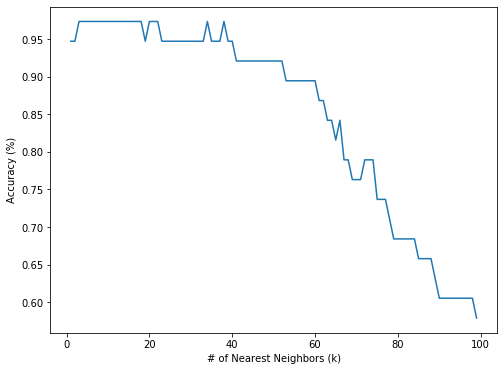

In [187]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(range(1,100), accuracies)
ax.set_xlabel('# of Nearest Neighbors (k)')
ax.set_ylabel('Accuracy (%)');